In [2]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("emails.csv")
data.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [4]:
data.shape

(5728, 2)

In [8]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [9]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [10]:
import seaborn as sns

<Axes: xlabel='spam', ylabel='count'>

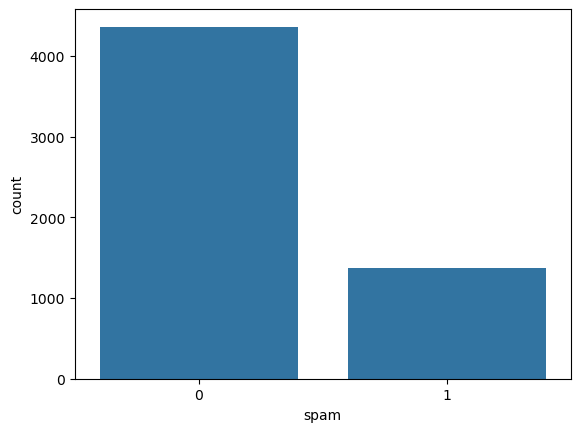

In [13]:
sns.countplot(x='spam', data=data)

In [14]:
data.duplicated().sum()

np.int64(33)

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [18]:
data.shape

(5695, 2)

In [19]:
5728 - 33

5695

<Axes: xlabel='spam', ylabel='count'>

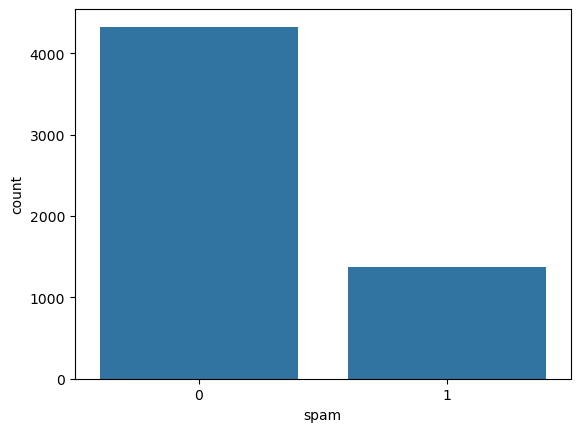

In [22]:
sns.countplot(x='spam', data=data)

In [23]:
data['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

# Separate in X and Y

In [24]:
X = data['text'].values
y = data['spam'].values

In [25]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Train - Test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state= 0)

In [27]:
X_train.shape

(4556,)

In [28]:
X_test.shape

(1139,)

In [29]:
y_train.shape

(4556,)

In [30]:
y_test.shape

(1139,)

# Preprocessing 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer()


# Training by ML Algorithm

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [34]:
pipe = make_pipeline(cv, nb)

In [35]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [36]:
y_pred = pipe.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.990342405618964

In [40]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([1])

In [41]:
import pickle
pickle.dump(pipe, open("Naive_bayes_model.pkl",'wb'))

TESTING VISUALIZATION

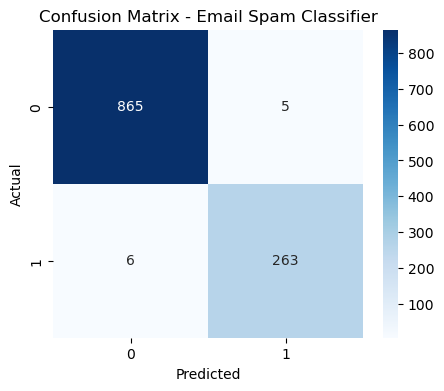

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Email Spam Classifier")
plt.show()


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       870
           1       0.98      0.98      0.98       269

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



array([[865,   5],
       [  6, 263]])

MODEL TESTING

In [44]:
test_emails = [
    "Congratulations! You won a free iPhone. Click now",
    "Hey machi, tomorrow college pogalama?",
    "Urgent offer!!! Limited time deal",
    "Please find the attached project report"
]


In [45]:
pipe.predict(test_emails)


array([1, 0, 1, 0])

In [47]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!
